# **EDA PROJECT 5:**
# **Unveiling Mortality Trends: A Data-Driven Exploration of Leading Causes of Death in the United States (1999–2017)**

---



# **About the Project**
* * *
* * *

This project involves my comprehensive exploratory data analysis (EDA) on the NCHS Leading Causes of Death dataset for the United States. I obtained the dataset from the National Center for Health Statistics (NCHS) via [data.gov](https://catalog.data.gov/dataset/nchs-leading-causes-of-death-united-states), which provides mortality data by cause of death, state, and year for the period 1999-2017.

My primary objective in this analysis is to gain insights into the patterns and trends of leading causes of death in the United States, including:

*   Identifying the most prevalent causes of death.
*   Examining how death counts and age-adjusted death rates vary across different states and over time.
*   Understanding the relationship between raw death counts and age-adjusted death rates.
*   Exploring changes in the ranking of leading causes over the years.

Through this EDA, I aim to uncover key findings that can contribute to a better understanding of mortality in the US and potentially inform public health strategies.

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the NCHS - Leading Causes of Death (COD): United States Dataset
leading_causes_of_death = pd.read_csv('/content/drive/MyDrive/NCHS Dataset/NCHS_-_Leading_Causes_of_Death__United_States.csv')

# **Initial Review of Data**
---
---

In [ ]:
# Explore the first five records
leading_causes_of_death.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


In [ ]:
# Explore the last five records
leading_causes_of_death.tail()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
10863,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Virginia,1035,16.9
10864,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Washington,278,5.2
10865,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,West Virginia,345,16.4
10866,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Wisconsin,677,11.9
10867,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Wyoming,30,6.8


In [ ]:
# find out the number of rows and columns in the dataset
leading_causes_of_death.shape

(10868, 6)

**Observations:**



*  Dataset comprises 10868 observations(rows) and 6 features(columns).



In [ ]:
# Check the data types of the Columns/features
leading_causes_of_death.dtypes.to_frame("Data Types")

,Data Types
Year,int64
113 Cause Name,object
Cause Name,object
State,object
Deaths,int64
Age-adjusted Death Rate,float64


**Observations:**
*  There are 3 columns with object data types, 2 columns with int64 data types and 1 column with float64 data type.



In [ ]:
# Check the number of unique values in the categorical columns/feature
categorical_features = leading_causes_of_death.select_dtypes(include=["object"]).columns
leading_causes_of_death[categorical_features].nunique().to_frame("Counts")

,Counts
113 Cause Name,11
Cause Name,11
State,52


In [ ]:
# Check the unique values for each Categorical features in the dataset
for feature in categorical_features:
  print(f"Unique values in {feature}: {leading_causes_of_death[feature].unique()}")
  print("-" * 100)

Unique values in 113 Cause Name: ['Accidents (unintentional injuries) (V01-X59,Y85-Y86)' 'All Causes'
 "Alzheimer's disease (G30)" 'Cerebrovascular diseases (I60-I69)'
 'Chronic lower respiratory diseases (J40-J47)'
 'Diabetes mellitus (E10-E14)'
 'Diseases of heart (I00-I09,I11,I13,I20-I51)'
 'Influenza and pneumonia (J09-J18)'
 'Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)'
 'Malignant neoplasms (C00-C97)'
 'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)']
----------------------------------------------------------------------------------------------------
Unique values in Cause Name: ['Unintentional injuries' 'All causes' "Alzheimer's disease" 'Stroke'
 'CLRD' 'Diabetes' 'Heart disease' 'Influenza and pneumonia' 'Suicide'
 'Cancer' 'Kidney disease']
----------------------------------------------------------------------------------------------------
Unique values in State: ['United States' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 

**Observations:**

*   The `113 Cause Name` and `Cause Name` columns both contain 11 unique values, representing different leading causes of death.
*   The `State` column contains 52 unique values, which includes all US states and 'United States'. The inclusion of 'United States' as a state is unusual and likely represents aggregate data for the entire country rather than a specific state.
*   The 'All Causes' entry in the `113 Cause Name` and `Cause Name` columns represents the total number of deaths from all causes, which is not a specific cause of death and should be treated separately from the other causes.

**Handling 'United States' and 'All Causes' Rows:**

*   The rows where `State` is 'United States' represent national-level data. Depending on the analysis, I might need to exclude these rows when I am focusing on state-level comparisons,andr keep them when I amcomparing state data to the national average.
*   The rows where `113 Cause Name` or `Cause Name` is 'All Causes' represent the total death count. These rows should be handled separately from the specific cause-of-death data. You might want to exclude them if analyzing specific causes, or keep them if analyzing overall mortality trends.

In [ ]:
# Inspect the column names
leading_causes_of_death.columns

Index(['Year', '113 Cause Name', 'Cause Name', 'State', 'Deaths',
       'Age-adjusted Death Rate'],
      dtype='object')

**Observations:**

*   Some column names, such as '113 Cause Name' and 'Age-adjusted Death Rate', contain spaces and special characters that might require cleaning or renaming for easier use in analysis and coding.

In [ ]:
# Statistical Overview of the Dataset
leading_causes_of_death.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10868.0,2008.000000,5.477478,1999.0,2003.0,2008.0,2013.000,2017.0
Deaths,10868.0,15459.910195,112876.022311,21.0,612.0,1718.5,5756.500,2813503.0
Age-adjusted Death Rate,10868.0,127.563894,223.639771,2.6,19.2,35.9,151.725,1087.3


**Observations from Statistical Overview:**

*   The `Year` column ranges from 1999 to 2017, indicating the time period covered by the dataset.
*   The `Deaths` column shows a wide range, with a minimum of 21 and a maximum of over 2.8 million. This suggests the dataset includes both specific cause-of-death data for individual states and aggregate data (likely for 'All Causes' or 'United States'). The large standard deviation also indicates significant variability in death counts.
*   The `Age-adjusted Death Rate` also has a wide range, from 2.6 to 1087.3, with a large standard deviation, indicating variability in death rates across different causes and states.

# **Cleaning**
---
---

## **Checking for Missing Values**

In [ ]:
# Check for missing values
leading_causes_of_death.isnull().sum().to_frame("Missing Values")

,Missing Values
Year,0
113 Cause Name,0
Cause Name,0
State,0
Deaths,0
Age-adjusted Death Rate,0


**Observation:**
* There are no missing numbers in the dataset.

## **Renaming Columns**

In [ ]:
# Access the current column names
print("Original column names:", leading_causes_of_death.columns.tolist())

# Create a dictionary to map old column names to new names
new_column_names = {
    '113 Cause Name': 'detailed_cause_name',
    'Cause Name': 'cause_name',
    'State': 'state',
    'Deaths': 'deaths',
    'Age-adjusted Death Rate': 'age_adjusted_death_rate',
    'Year': 'year' # Added year for consistency
}

# Rename the columns using the dictionary
leading_causes_of_death.rename(columns=new_column_names, inplace=True)

# Verify the column names have been successfully renamed
print("New column names:", leading_causes_of_death.columns.tolist())

Original column names: ['Year', '113 Cause Name', 'Cause Name', 'State', 'Deaths', 'Age-adjusted Death Rate']
New column names: ['year', 'detailed_cause_name', 'cause_name', 'state', 'deaths', 'age_adjusted_death_rate']


## **Handling 'united states' and 'all causes' rows**

In [ ]:
# Filter out rows where 'state' is 'United States'
state_level_data = leading_causes_of_death[leading_causes_of_death['state'] != 'United States'].copy()

# Filter out rows where 'cause_name' is 'All causes' from the state_level_data
specific_causes_data = state_level_data[state_level_data['cause_name'] != 'All causes'].copy()

# Display the first few rows of both dataframes
print("First few rows of state_level_data:")
display(state_level_data.head())

print("\nFirst few rows of specific_causes_data:")
display(specific_causes_data.head())

First few rows of state_level_data:


,year,detailed_cause_name,cause_name,state,deaths,age_adjusted_death_rate
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8
5,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13840,33.2



First few rows of specific_causes_data:


,year,detailed_cause_name,cause_name,state,deaths,age_adjusted_death_rate
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8
5,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13840,33.2


In [ ]:
# Re-check the unique values for 'cause_name' and 'state' after renaming
print("Unique values in 'cause_name':", specific_causes_data['cause_name'].unique())
print("-" * 100)
print("Unique values in 'state':", state_level_data['state'].unique())
print("-" * 100)

Unique values in 'cause_name': ['Unintentional injuries' "Alzheimer's disease" 'Stroke' 'CLRD' 'Diabetes'
 'Heart disease' 'Influenza and pneumonia' 'Suicide' 'Cancer'
 'Kidney disease']
----------------------------------------------------------------------------------------------------
Unique values in 'state': ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
---------------------------------------------------------------------------------

## **Checking for Duplicates**

In [ ]:
# Check for duplicate rows
num_duplicates = leading_causes_of_death.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


# **Exploratory Data Analysis**
---
---

## **Univariate Statistical Analysis**

### **QUESTION 1: Which cause of death has the highest total number of deaths across all years and states?**

In [ ]:
# Group by 'cause_name' and sum 'deaths' using specific_causes_data
total_deaths_by_cause = specific_causes_data.groupby('cause_name')['deaths'].sum()

# Find the cause with the highest total deaths
highest_death_cause = total_deaths_by_cause.idxmax()
highest_death_count = total_deaths_by_cause.max()

print(f"The cause of death with the highest total number of deaths across all years and states is '{highest_death_cause}' with a total of {highest_death_count} deaths.")

The cause of death with the highest total number of deaths across all years and states is 'Heart disease' with a total of 12222640 deaths.


### **ANSWER 1:** The cause of death with the highest total number of deaths across all years and states is 'Heart disease' with a total of 12,222,640 deaths.

* * *

### **QUESTION 2: Which cause of death has the lowest total number of deaths across all years and states?**

In [ ]:
# Group by 'cause_name' and sum 'deaths' using specific_causes_data
total_deaths_by_cause = specific_causes_data.groupby('cause_name')['deaths'].sum()

# Find the cause with the lowest total deaths
lowest_death_cause = total_deaths_by_cause.idxmin()
lowest_death_count = total_deaths_by_cause.min()

print(f"The cause of death with the lowest total number of deaths across all years and states is '{lowest_death_cause}' with a total of {lowest_death_count} deaths.")

The cause of death with the lowest total number of deaths across all years and states is 'Suicide' with a total of 697016 deaths.


### **ANSWER 2:** The cause of death with the lowest total number of deaths across all years and states is 'Suicide' with a total of 697016 deaths.

* * *

### **QUESTION 3: What is the distribution of deaths across different states for a given year?**

In [ ]:
# Select a specific year to analyze
year_to_analyze = 2017

# Filter the state_level_data for the selected year
deaths_2017 = state_level_data[state_level_data['year'] == year_to_analyze]

# Display the distribution of deaths across states for the selected year
# We can look at the top and bottom states by death count as a start
print(f"Distribution of deaths across states in {year_to_analyze}:")
display(deaths_2017.groupby('state')['deaths'].sum().sort_values(ascending=False))

Distribution of deaths across states in 2017:


,deaths
state,
California,474950
Florida,356095
Texas,342688
New York,271821
Pennsylvania,234812
Ohio,215084
Illinois,190425
Michigan,172128
North Carolina,160891


### **For a clearer view of the distribution, let's explore the total deaths for the top 10 states in 2017**

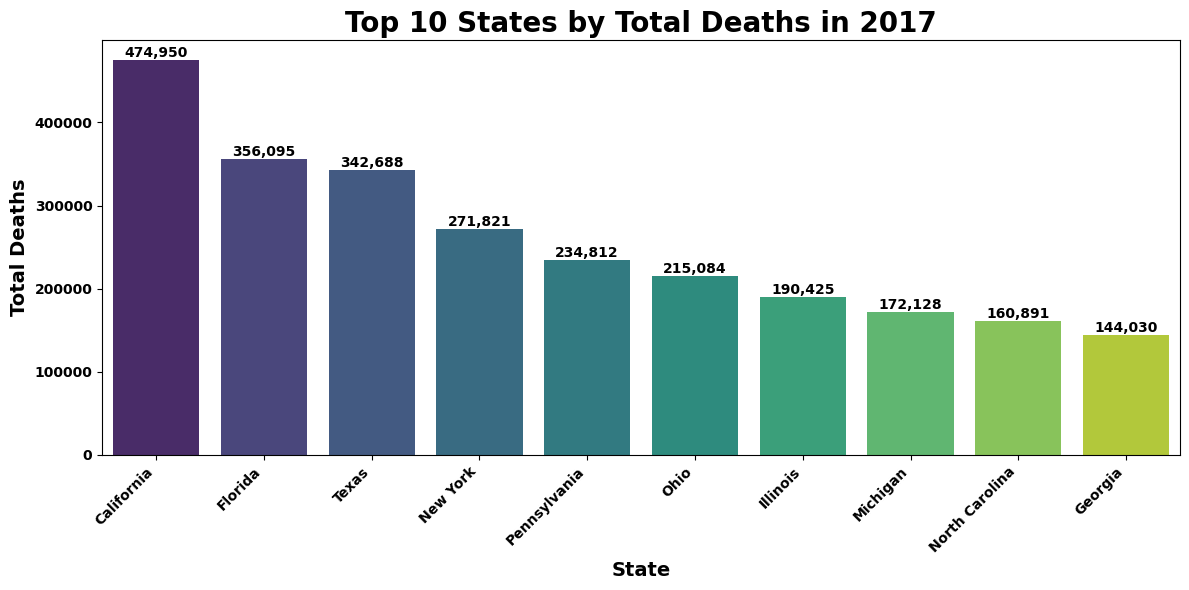

In [ ]:
# Get the top 10 states by total deaths in 2017
top_10_states_2017 = deaths_2017.groupby('state')['deaths'].sum().sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_states_2017.index, y=top_10_states_2017.values, palette='viridis')
plt.title(f'Top 10 States by Total Deaths in {year_to_analyze}', weight = "bold", fontsize=20)
plt.xlabel('State', weight = "bold", fontsize=14)
plt.ylabel('Total Deaths', weight = "bold", fontsize=14)
plt.xticks(rotation=45, ha='right', weight = "bold")
plt.yticks(weight='bold')
plt.tight_layout()

# Add the death counts inside each bar
for container in ax.containers:
    ax.bar_label(container, color='black', weight = "bold", fmt='{:,.0f}')

plt.show()

### **ANSWER 3:** The distribution of deaths across states in 2017 shows significant variation. California had the highest number of total deaths, followed by Florida and Texas. Alaska had the lowest number of total deaths in 2017.

---



### **QUESTION 4: What is the average age-adjusted death rate for each cause of death?**

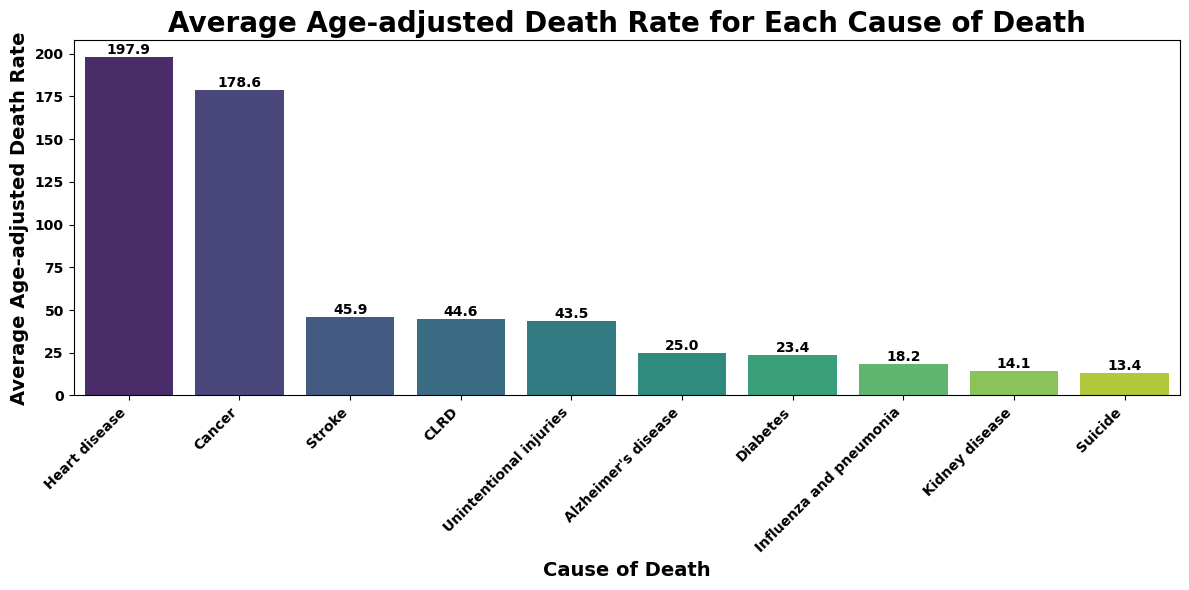

In [ ]:
# Calculate the average age-adjusted death rate for each cause using specific_causes_data
average_age_adjusted_rate_by_cause = specific_causes_data.groupby('cause_name')['age_adjusted_death_rate'].mean().sort_values(ascending=False)

# Create a bar chart for the average age-adjusted death rate by cause
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_age_adjusted_rate_by_cause.index, y=average_age_adjusted_rate_by_cause.values, palette='viridis')
plt.title('Average Age-adjusted Death Rate for Each Cause of Death', weight = "bold", fontsize=20)
plt.xlabel('Cause of Death', weight = "bold", fontsize=14)
plt.ylabel('Average Age-adjusted Death Rate', weight = "bold", fontsize=14)
plt.xticks(rotation=45, ha='right', weight = "bold")
plt.yticks(weight='bold')
plt.tight_layout()

# Add the average age-adjusted death rates inside each bar
for container in ax.containers:
    ax.bar_label(container, color='black', weight = "bold", fmt='{:,.1f}')

plt.show()

### **ANSWER 4:** The average age-adjusted death rate varies significantly across different causes of death. Based on our analysis, Heart disease has the highest average age-adjusted death rate, followed by Cancer.

---



## **Bivariate Statistical Analysis**

---



### **QUESTION 5: What is the trend of total deaths in the United States over the years?**

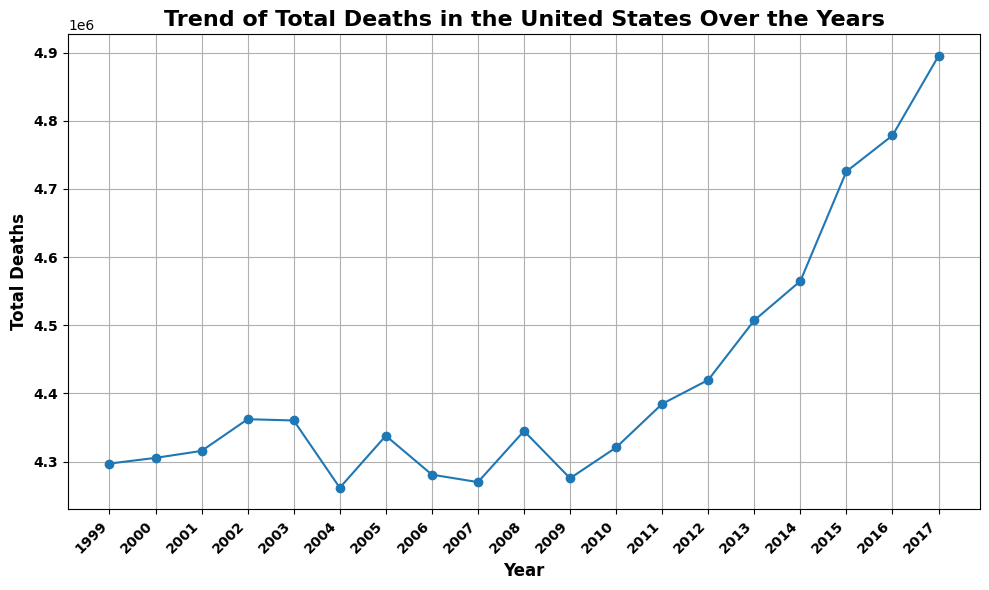

In [ ]:
# Filter for 'United States' and group by year to get total deaths
us_total_deaths = leading_causes_of_death[leading_causes_of_death['state'] == 'United States'].groupby('year')['deaths'].sum()

#print("Total Deaths in the United States Over the Years:")
#display(us_total_deaths)

# Visualize the trend
plt.figure(figsize=(10, 6))
us_total_deaths.plot(kind='line', marker='o')
plt.title('Trend of Total Deaths in the United States Over the Years', weight = "bold", fontsize=16)
plt.xlabel('Year', weight = "bold", fontsize=12)
plt.ylabel('Total Deaths', weight = "bold", fontsize=12)
plt.grid(True)
plt.xticks(us_total_deaths.index, rotation=45, ha='right', weight = "bold")
plt.yticks(weight='bold')
plt.tight_layout()
plt.show()

### **ANSWER 5:** The trend of total deaths in the United States over the years shows a general increase from 1999 to 2017. The line plot clearly illustrates this upward trend in the total number of deaths recorded in the United States during this period.

---



### **QUESTION 6: How does the number of deaths for a specific cause vary by state?**

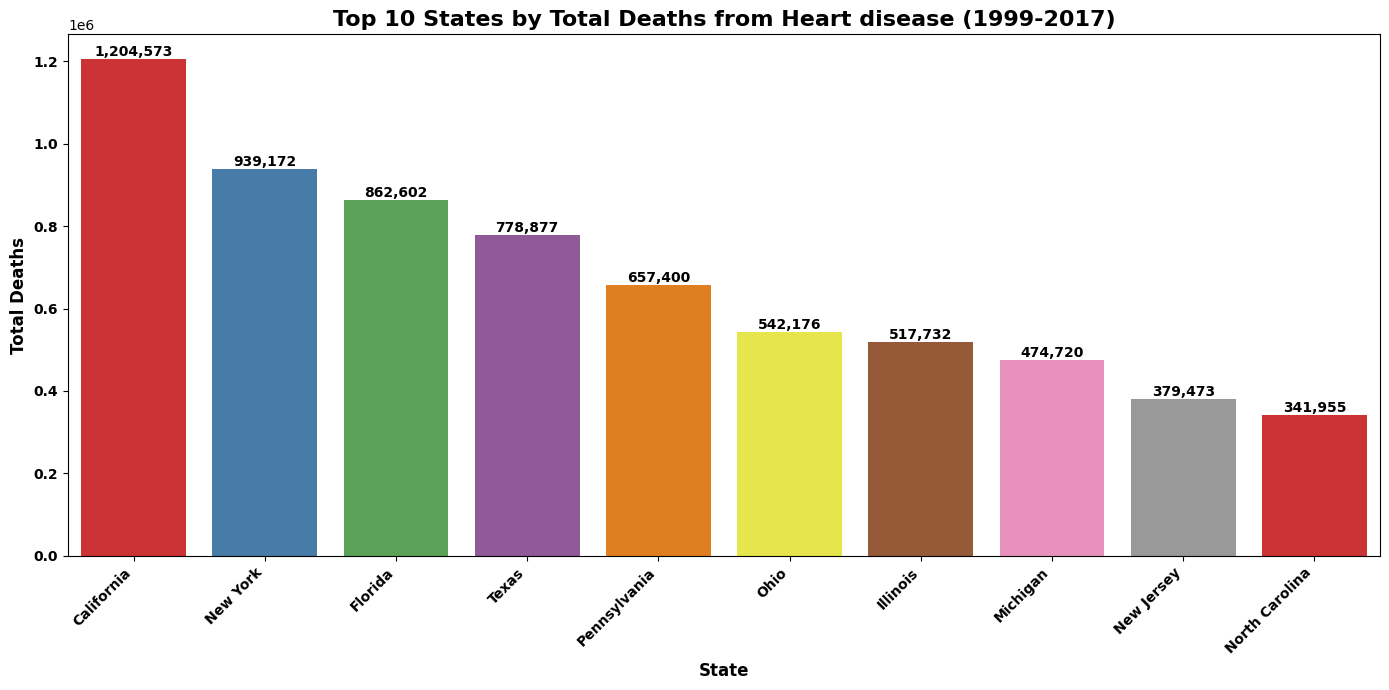

In [ ]:
# Select a specific cause of death to analyze
# Focus on the one with the highest total number of deaths across all years and states
cause_to_analyze = 'Heart disease'

# Filter the specific_causes_data for the selected cause
deaths_by_state_for_cause = specific_causes_data[specific_causes_data['cause_name'] == cause_to_analyze]

# Group by state and sum the deaths for the selected cause
total_deaths_by_state = deaths_by_state_for_cause.groupby('state')['deaths'].sum().sort_values(ascending=False)

#print(f"Total deaths from '{cause_to_analyze}' by State across all years:")
#display(total_deaths_by_state)

# Visualize the distribution for the selected cause across states (showing top states for clarity)
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=total_deaths_by_state.head(10).index, y=total_deaths_by_state.head(10).values, palette='Set1')
plt.title(f'Top 10 States by Total Deaths from {cause_to_analyze} (1999-2017)', weight = "bold", fontsize=16)
plt.xlabel('State', weight = "bold", fontsize=12)
plt.ylabel('Total Deaths', weight = "bold", fontsize=12)
plt.xticks(rotation=45, ha='right', weight = "bold")
plt.yticks(weight='bold')
plt.tight_layout()

# Add death counts on the bars
for container in ax.containers:
    ax.bar_label(container, color='black', weight = "bold", fmt='{:,.0f}')

plt.show()

### **ANSWER 6:** The number of deaths for 'Heart disease' varies significantly by state. As observed in the bar chart, states with larger populations such as California, Florida, and Texas have the highest total number of deaths from Heart disease. This variation highlights the impact of population size on the raw death counts for a specific cause across different states.

---



### **QUESTION 7: How has the age-adjusted death rate for a specific cause changed over time?**

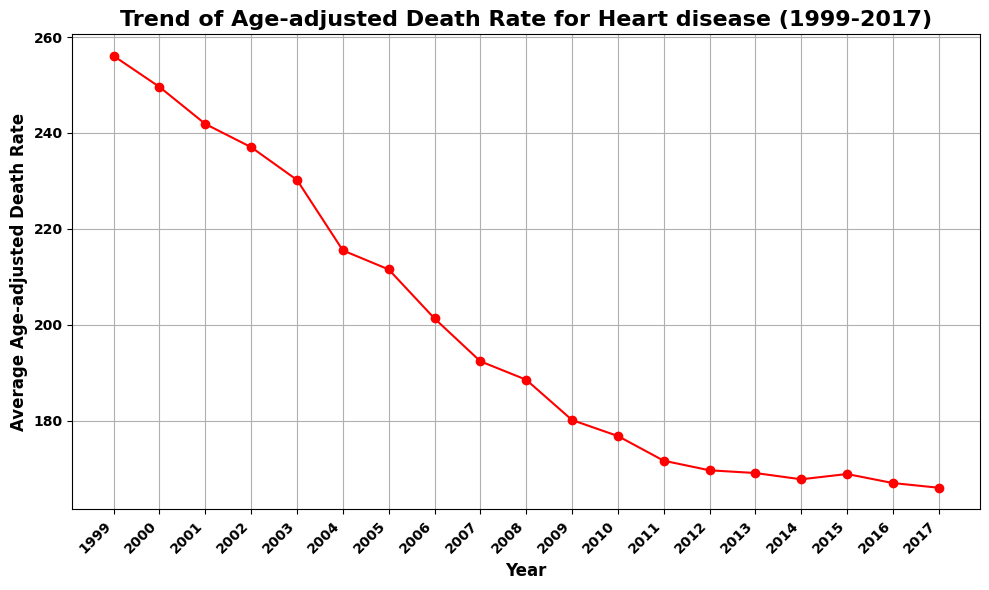

In [ ]:
# Select a specific cause of death to analyze
cause_to_analyze_trend = 'Heart disease'

# Filter the specific_causes_data for the selected cause
cause_data = specific_causes_data[specific_causes_data['cause_name'] == cause_to_analyze_trend]

# Group by year and calculate the average age-adjusted death rate
age_adjusted_rate_trend = cause_data.groupby('year')['age_adjusted_death_rate'].mean()

#print(f"Average Age-adjusted Death Rate for '{cause_to_analyze_trend}' over the years:")
#display(age_adjusted_rate_trend)

# Visualize the trend
plt.figure(figsize=(10, 6))
age_adjusted_rate_trend.plot(kind='line', marker='o', color='red')
plt.title(f'Trend of Age-adjusted Death Rate for {cause_to_analyze_trend} (1999-2017)', weight = "bold", fontsize=16)
plt.xlabel('Year', weight = "bold", fontsize=12)
plt.ylabel('Average Age-adjusted Death Rate', weight = "bold", fontsize=12)
plt.grid(True)
plt.xticks(age_adjusted_rate_trend.index, rotation=45, ha='right', weight = "bold")
plt.yticks(weight='bold')
plt.tight_layout()
plt.show()

### **ANSWER 7:** The age-adjusted death rate for Heart disease has generally decreased over the years from 1999 to 2017. The line plot clearly illustrates this downward trend in the average age-adjusted death rate for Heart disease during this period.

---



### **QUESTION 8: Which state has the highest age-adjusted death rate for each cause?**

In [ ]:
# Get the unique causes of death
unique_causes = specific_causes_data['cause_name'].unique()

# Create an empty list to store the results
highest_rate_states = []

# Iterate through each cause and find the state with the highest rate
for cause in unique_causes:
    # Filter data for the current cause
    cause_data_filtered = specific_causes_data[specific_causes_data['cause_name'] == cause]

    # Find the state with the highest age-adjusted death rate for this cause
    if not cause_data_filtered.empty: # Check if there is data for the cause
        state_highest_rate = cause_data_filtered.loc[cause_data_filtered['age_adjusted_death_rate'].idxmax()]
        highest_rate_states.append({
            'Cause Name': cause,
            'State with Highest Rate': state_highest_rate['state'],
            'Highest Age-adjusted Death Rate': state_highest_rate['age_adjusted_death_rate']
        })

# Convert the list of dictionaries to a DataFrame
highest_rate_df = pd.DataFrame(highest_rate_states)

print("State with the highest age-adjusted death rate for each cause of death:")
display(highest_rate_df)

State with the highest age-adjusted death rate for each cause of death:


,Cause Name,State with Highest Rate,Highest Age-adjusted Death Rate
0,Unintentional injuries,West Virginia,100.3
1,Alzheimer's disease,Mississippi,49.6
2,Stroke,South Carolina,83.4
3,CLRD,Wyoming,75.6
4,Diabetes,Louisiana,42.3
5,Heart disease,Mississippi,347.4
6,Influenza and pneumonia,Tennessee,32.5
7,Suicide,Wyoming,29.6
8,Cancer,District of Columbia,241.4
9,Kidney disease,Louisiana,27.8


### **ANSWER 8:** The state with the highest age-adjusted death rate varies depending on the specific cause of death. As shown in the table above, different states have the highest age-adjusted death rates for different causes. Notably, Wyoming has the highest age-adjusted death rate for two causes: CLRD and Suicide.

---



### **QUESTION 9: Which state has the lowest age-adjusted death rate for a particular cause?**

In [ ]:
# Get the unique causes of death
unique_causes = specific_causes_data['cause_name'].unique()

# Create an empty list to store the results
lowest_rate_states = []

# Iterate through each cause and find the state with the lowest rate
for cause in unique_causes:
    # Filter data for the current cause
    cause_data_filtered = specific_causes_data[specific_causes_data['cause_name'] == cause]

    # Find the state with the lowest age-adjusted death rate for this cause
    if not cause_data_filtered.empty: # Check if there is data for the cause
        state_lowest_rate = cause_data_filtered.loc[cause_data_filtered['age_adjusted_death_rate'].idxmin()]
        lowest_rate_states.append({
            'Cause Name': cause,
            'State with Lowest Rate': state_lowest_rate['state'],
            'Lowest Age-adjusted Death Rate': state_lowest_rate['age_adjusted_death_rate']
        })

# Convert the list of dictionaries to a DataFrame
lowest_rate_df = pd.DataFrame(lowest_rate_states)

print("State with the lowest age-adjusted death rate for each cause of death:")
display(lowest_rate_df)

State with the lowest age-adjusted death rate for each cause of death:


,Cause Name,State with Lowest Rate,Lowest Age-adjusted Death Rate
0,Unintentional injuries,Massachusetts,19.6
1,Alzheimer's disease,New York,7.0
2,Stroke,New York,24.6
3,CLRD,Hawaii,15.6
4,Diabetes,Nevada,11.4
5,Heart disease,Minnesota,114.9
6,Influenza and pneumonia,Vermont,7.0
7,Suicide,District of Columbia,3.8
8,Cancer,Utah,120.3
9,Kidney disease,Vermont,2.6


### **ANSWER 9:** The state with the lowest age-adjusted death rate for each cause also varies. As shown in the table above, different states have the lowest age-adjusted death rates for different causes. For example, Massachusetts has the lowest rate for Unintentional injuries, New York for Alzheimer's disease and Stroke, and Vermont for Influenza and pneumonia and Kidney disease.

---



### **QUESTION 10: Is there a correlation between the number of deaths and the age-adjusted death rate for a specific cause?**

Correlation between Deaths and Age-adjusted Death Rate for 'Heart disease': 0.18


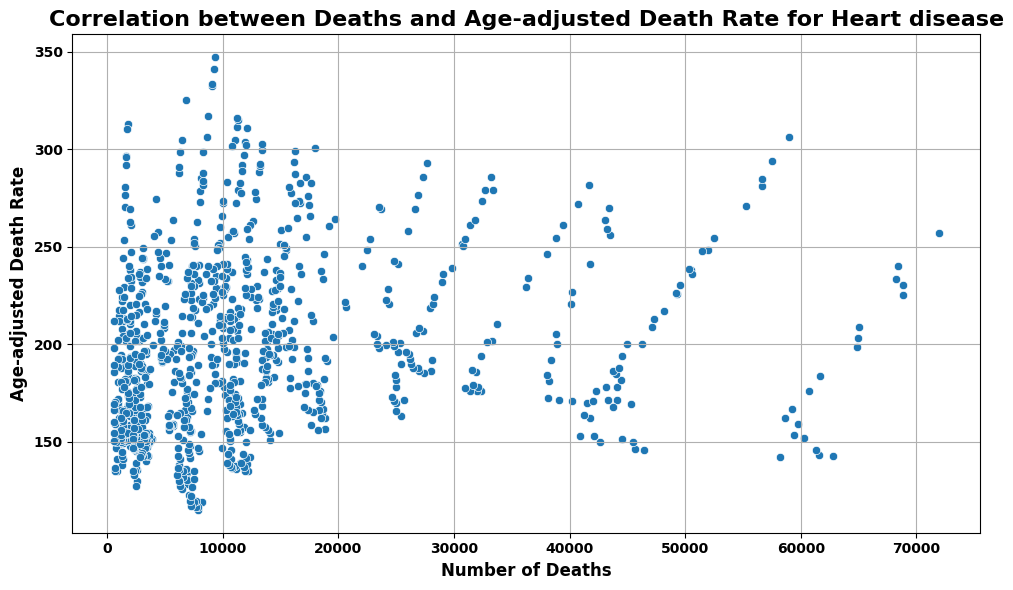

In [ ]:
# Select a specific cause of death to analyze
cause_to_analyze_correlation = 'Heart disease'

# Filter the specific_causes_data for the selected cause
cause_data_filtered = specific_causes_data[specific_causes_data['cause_name'] == cause_to_analyze_correlation].copy()

# Calculate the correlation between 'deaths' and 'age_adjusted_death_rate' for this cause
correlation = cause_data_filtered['deaths'].corr(cause_data_filtered['age_adjusted_death_rate'])

print(f"Correlation between Deaths and Age-adjusted Death Rate for '{cause_to_analyze_correlation}': {correlation:.2f}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cause_data_filtered, x='deaths', y='age_adjusted_death_rate')
plt.title(f'Correlation between Deaths and Age-adjusted Death Rate for {cause_to_analyze_correlation}', weight = "bold", fontsize=16)
plt.xlabel('Number of Deaths', weight = "bold", fontsize=12)
plt.ylabel('Age-adjusted Death Rate', weight = "bold", fontsize=12)
plt.xticks(weight = "bold")
plt.yticks(weight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

### **ANSWER 10:** For 'Heart disease', there is a weak positive correlation between the number of deaths and the age-adjusted death rate, with a correlation coefficient of 0.18. The scatter plot visually confirms this, showing that while there is a general tendency for states with more deaths to also have slightly higher age-adjusted death rates, the relationship is not strong and the points are quite dispersed. This suggests that while related, other factors significantly influence the age-adjusted death rate beyond just the raw number of deaths.

---



### **QUESTION 11: Which states consistently have higher or lower death rates for certain causes?**

In [ ]:
# Calculate the average age-adjusted death rate for each cause in each state
average_age_adjusted_rate_by_state_cause = specific_causes_data.groupby(['state', 'cause_name'])['age_adjusted_death_rate'].mean().to_frame("Average Age-adjusted Death Rate")

# Get unique causes of death
unique_causes = specific_causes_data['cause_name'].unique()

highest_average_rates = []
lowest_average_rates = []

# Iterate through each cause to find states with the highest and lowest average rates
for cause in unique_causes:
    # Filter the average rates for the current cause
    cause_average_rates = average_age_adjusted_rate_by_state_cause.xs(cause, level='cause_name')

    if not cause_average_rates.empty:
        # State with the highest average rate for this cause
        state_highest_avg = cause_average_rates.idxmax()['Average Age-adjusted Death Rate']
        highest_avg_rate = cause_average_rates.max()['Average Age-adjusted Death Rate']
        highest_average_rates.append({
            'Cause Name': cause,
            'State with Highest Average Rate': state_highest_avg,
            'Highest Average Age-adjusted Death Rate': highest_avg_rate
        })

        # State with the lowest average rate for this cause
        state_lowest_avg = cause_average_rates.idxmin()['Average Age-adjusted Death Rate']
        lowest_avg_rate = cause_average_rates.min()['Average Age-adjusted Death Rate']
        lowest_average_rates.append({
            'Cause Name': cause,
            'State with Lowest Average Rate': state_lowest_avg,
            'Lowest Average Age-adjusted Death Rate': lowest_avg_rate
        })

# Convert lists to DataFrames
highest_average_rates_df = pd.DataFrame(highest_average_rates)
lowest_average_rates_df = pd.DataFrame(lowest_average_rates)

print("States with the Highest Average Age-adjusted Death Rate for Each Cause (1999-2017):")
display(highest_average_rates_df)

print("\nStates with the Lowest Average Age-adjusted Death Rate for Each Cause (1999-2017):")
display(lowest_average_rates_df)

States with the Highest Average Age-adjusted Death Rate for Each Cause (1999-2017):


,Cause Name,State with Highest Average Rate,Highest Average Age-adjusted Death Rate
0,Unintentional injuries,New Mexico,64.568421
1,Alzheimer's disease,Washington,40.984211
2,Stroke,Arkansas,58.752632
3,CLRD,West Virginia,61.531579
4,Diabetes,West Virginia,34.484211
5,Heart disease,Mississippi,277.131579
6,Influenza and pneumonia,Tennessee,24.963158
7,Suicide,Alaska,21.889474
8,Cancer,Kentucky,210.157895
9,Kidney disease,Louisiana,24.884211



States with the Lowest Average Age-adjusted Death Rate for Each Cause (1999-2017):


,Cause Name,State with Lowest Average Rate,Lowest Average Age-adjusted Death Rate
0,Unintentional injuries,New York,26.357895
1,Alzheimer's disease,New York,10.142105
2,Stroke,New York,30.836842
3,CLRD,Hawaii,19.510526
4,Diabetes,Nevada,15.236842
5,Heart disease,Minnesota,137.410526
6,Influenza and pneumonia,Florida,11.305263
7,Suicide,District of Columbia,5.731579
8,Cancer,Utah,134.521053
9,Kidney disease,Washington,6.278947


### **ANSWER 11:** Based on the average age-adjusted death rates from 1999 to 2017, the states with consistently higher or lower death rates vary by cause. The tables above show the states with the highest and lowest *average* age-adjusted death rates for each specific cause over this period. These averages provide insight into which states tend to be at the extremes for different leading causes of death.

---



### **QUESTION 12: How does the difference between the raw death count and the age-adjusted death rate vary by cause or state?**

In [ ]:
# Calculate the difference between deaths and age-adjusted death rate
# Note: These are on different scales, so the direct difference might be less interpretable
specific_causes_data['death_rate_difference'] = specific_causes_data['deaths'] - specific_causes_data['age_adjusted_death_rate']

print("DataFrame with 'death_rate_difference' column:")
display(specific_causes_data.head())

# We can then analyze or visualize this difference across causes and states
# For example, let's look at the average difference by cause
average_difference_by_cause = specific_causes_data.groupby('cause_name')['death_rate_difference'].mean().sort_values(ascending=False)

print("\nAverage Death-Rate Difference by Cause:")
display(average_difference_by_cause)

# And by state
average_difference_by_state = specific_causes_data.groupby('state')['death_rate_difference'].mean().sort_values(ascending=False)

print("\nAverage Death-Rate Difference by State:")
display(average_difference_by_state)

DataFrame with 'death_rate_difference' column:


,year,detailed_cause_name,cause_name,state,deaths,age_adjusted_death_rate,death_rate_difference
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8,2649.2
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7,372.3
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2,4127.8
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8,1573.2
5,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13840,33.2,13806.8



Average Death-Rate Difference by Cause:


,death_rate_difference
cause_name,
Heart disease,12415.729205
Cancer,11011.935397
Stroke,2767.849432
CLRD,2633.306089
Unintentional injuries,2379.443550
Alzheimer's disease,1517.605779
Diabetes,1421.326729
Influenza and pneumonia,1111.455005
Kidney disease,872.011765



Average Death-Rate Difference by State:


,death_rate_difference
state,
California,18862.540526
Florida,13279.145263
Texas,12400.990526
New York,11861.057368
Pennsylvania,9701.629474
Ohio,8383.649474
Illinois,7877.168947
Michigan,6851.322632
North Carolina,5810.401579


### **ANSWER 12:** The difference between the raw death count and the age-adjusted death rate varies significantly by both cause and state. As observed from the calculated average differences, causes with higher overall death counts (like Heart disease and Cancer) tend to have a larger average difference. Similarly, states with larger populations generally show a larger average difference. This highlights how population size and age structure contribute to the raw death counts compared to the age-adjusted rates, which account for these demographic factors.

---



## **Multivariate Statistical Analysis**

---



### **QUESTION 13: How does the ranking of leading causes of death change over the years?**

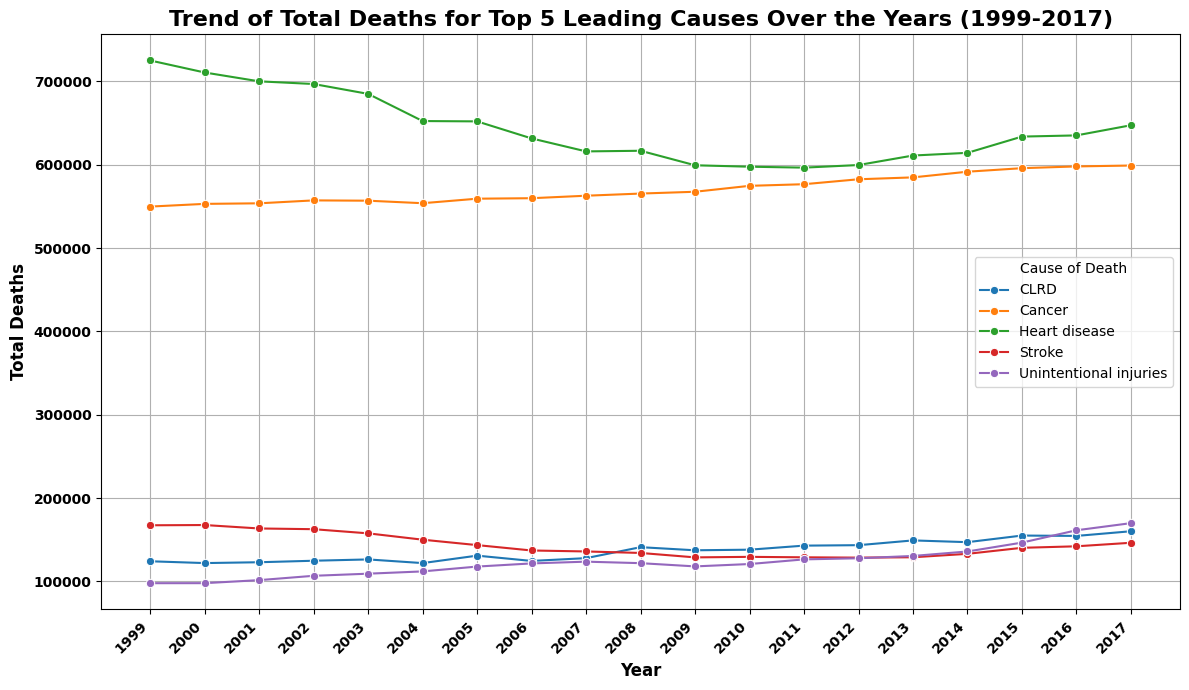

In [ ]:
# Group by year and cause name and sum deaths to see trends
deaths_by_year_cause = specific_causes_data.groupby(['year', 'cause_name'])['deaths'].sum().reset_index()

# To see ranking changes, we can look at the top causes each year
# Let's focus on the overall top causes for visualization
overall_top_causes = specific_causes_data.groupby('cause_name')['deaths'].sum().sort_values(ascending=False).head(5).index.tolist()

# Filter the data to include only the overall top causes
top_causes_trend_data = deaths_by_year_cause[deaths_by_year_cause['cause_name'].isin(overall_top_causes)]

# Visualize the trend of deaths for the top causes over the years
plt.figure(figsize=(12, 7))
sns.lineplot(data=top_causes_trend_data, x='year', y='deaths', hue='cause_name', marker='o')
plt.title('Trend of Total Deaths for Top 5 Leading Causes Over the Years (1999-2017)', weight = "bold", fontsize=16)
plt.xlabel('Year', weight = "bold", fontsize=12)
plt.ylabel('Total Deaths', weight = "bold", fontsize=12)
plt.grid(True)
plt.xticks(top_causes_trend_data['year'].unique(), rotation=45, ha='right', weight = "bold")
plt.yticks(weight='bold')
plt.legend(title='Cause of Death')
plt.tight_layout()
plt.show()

### **ANSWER 13:** Based on the trend of total deaths for the top 5 leading causes from 1999 to 2017, the ranking of these causes has remained relatively consistent over the years. Heart disease and Cancer have consistently been the top two leading causes of death by a significant margin, although the number of deaths from Heart disease has shown a general downward trend, while deaths from Cancer have slightly increased. Other top causes like Stroke, CLRD, and Unintentional injuries have shown some fluctuations but have generally maintained their relative positions in the ranking among this top group. The line plot visually demonstrates these trends and the stability in the top rankings.

---



### **QUESTION 14: How does the number of deaths for "All Causes" compare to the sum of deaths from specific causes?**

Comparison of 'All Causes' deaths vs. Sum of Specific Causes deaths (National Level):


,All Causes (US),Sum of Specific Causes (US),Difference
year,,,
1999,2391399,1905826,485573
2000,2403351,1902194,501157
2001,2416425,1899358,517067
2002,2443387,1918873,524514
2003,2448288,1912115,536173
2004,2397615,1864133,533482
2005,2448017,1889981,558036
2006,2426264,1854676,571588
2007,2423712,1846301,577411


<Figure size 1200x600 with 0 Axes>

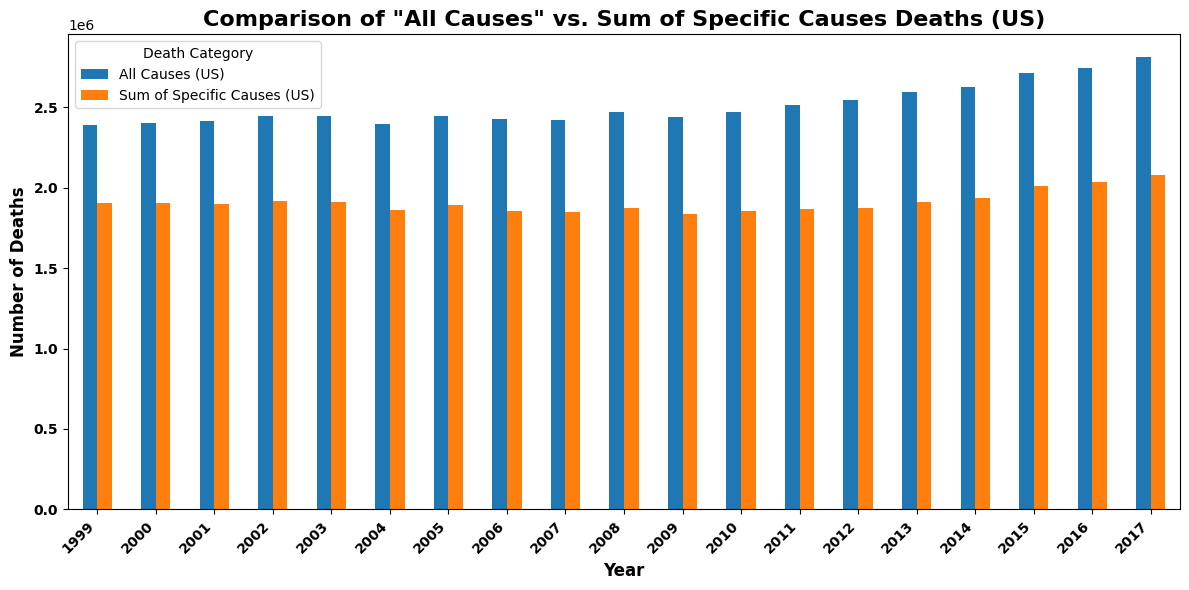

In [ ]:
# Filter for national level data ('United States')
us_data = leading_causes_of_death[leading_causes_of_death['state'] == 'United States']

# Filter for 'All Causes' deaths at the national level
all_causes_us = us_data[us_data['cause_name'] == 'All causes'].set_index('year')['deaths']

# Filter for specific causes deaths at the national level
specific_causes_us = us_data[us_data['cause_name'] != 'All causes']

# Group specific causes by year and sum the deaths
sum_specific_causes_us = specific_causes_us.groupby('year')['deaths'].sum()

# Compare the two
comparison_df = pd.DataFrame({
    'All Causes (US)': all_causes_us,
    'Sum of Specific Causes (US)': sum_specific_causes_us
})

comparison_df['Difference'] = comparison_df['All Causes (US)'] - comparison_df['Sum of Specific Causes (US)']

print("Comparison of 'All Causes' deaths vs. Sum of Specific Causes deaths (National Level):")
display(comparison_df)

# Visualize the comparison
plt.figure(figsize=(12, 6))
comparison_df[['All Causes (US)', 'Sum of Specific Causes (US)']].plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of "All Causes" vs. Sum of Specific Causes Deaths (US)', weight = "bold", fontsize=16)
plt.xlabel('Year', weight = "bold", fontsize=12)
plt.ylabel('Number of Deaths', weight = "bold", fontsize=12)
plt.xticks(rotation=45, ha='right', weight = "bold")
plt.yticks(weight='bold')
plt.legend(title='Death Category')
plt.tight_layout()
plt.show()

### **ANSWER 14:** The total number of deaths reported under "All Causes" at the national level is consistently higher than the sum of deaths from the specific causes listed in the dataset for each year. The difference between "All Causes" and the sum of specific causes represents deaths from other causes not explicitly listed in the dataset. The table and bar chart clearly show this difference across the years, indicating that the provided specific causes do not account for all recorded deaths.

---



### **QUESTION 15: What is the percentage of deaths for each cause relative to the total number of deaths in a given year?**

DataFrame with Percentage of Total Deaths per Cause per Year:


,year,state,cause_name,deaths,Total Specific Deaths,percentage_of_total
0,2017,Alabama,Unintentional injuries,2703,2081531,0.129856
1,2017,Alaska,Unintentional injuries,436,2081531,0.020946
2,2017,Arizona,Unintentional injuries,4184,2081531,0.201006
3,2017,Arkansas,Unintentional injuries,1625,2081531,0.078068
4,2017,California,Unintentional injuries,13840,2081531,0.664895



Average Percentage of Total Deaths by Cause in 2017 (across states):


,percentage_of_total
cause_name,
Heart disease,0.6%
Cancer,0.6%
Unintentional injuries,0.2%
CLRD,0.2%
Stroke,0.1%
Alzheimer's disease,0.1%
Diabetes,0.1%
Influenza and pneumonia,0.1%
Kidney disease,0.0%


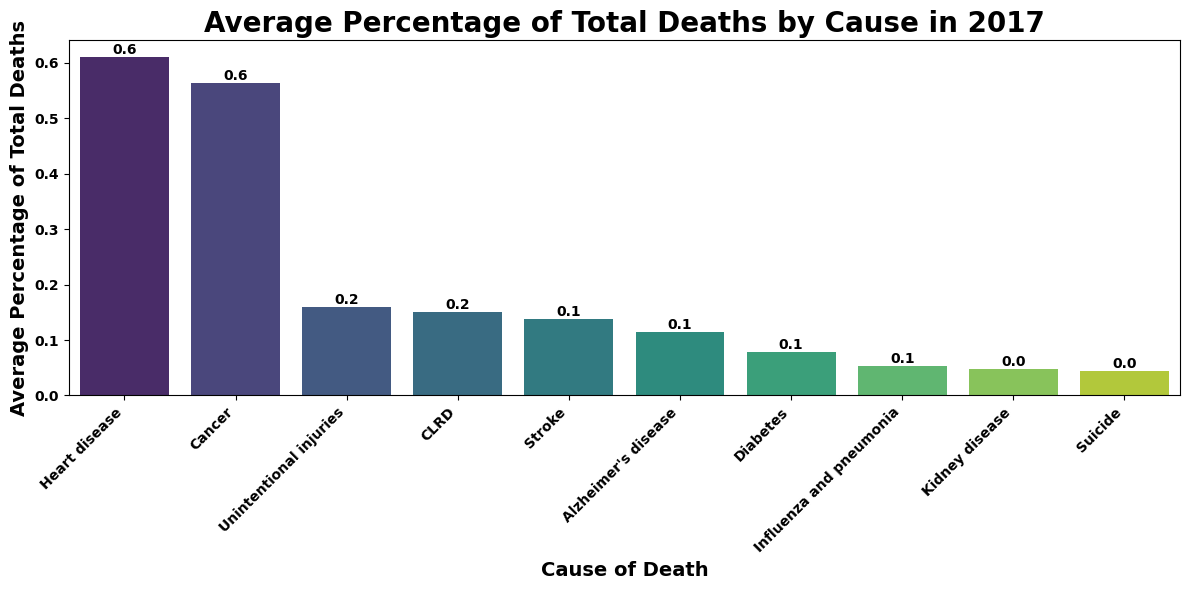

In [ ]:
# Calculate total deaths from specific causes per year
total_specific_deaths_per_year = specific_causes_data.groupby('year')['deaths'].sum().reset_index(name='Total Specific Deaths')

# Merge this total back with the specific_causes_data DataFrame
specific_causes_data_with_total = pd.merge(specific_causes_data, total_specific_deaths_per_year, on='year')

# Calculate the percentage of deaths for each cause in each year
specific_causes_data_with_total['percentage_of_total'] = (specific_causes_data_with_total['deaths'] / specific_causes_data_with_total['Total Specific Deaths']) * 100

# Display the data with the new percentage column (showing a few relevant columns)
print("DataFrame with Percentage of Total Deaths per Cause per Year:")
display(specific_causes_data_with_total[['year', 'state', 'cause_name', 'deaths', 'Total Specific Deaths', 'percentage_of_total']].head())

# To see the percentages by cause for a specific year, we can group and pivot
# Let's look at the average percentage for each cause across all states for a specific year (e.g., 2017)
year_to_analyze_percentage = 2017
percentage_2017 = specific_causes_data_with_total[specific_causes_data_with_total['year'] == year_to_analyze_percentage]

# Group by cause and calculate the average percentage across states for 2017
average_percentage_by_cause_2017 = percentage_2017.groupby('cause_name')['percentage_of_total'].mean().sort_values(ascending=False)

print(f"\nAverage Percentage of Total Deaths by Cause in {year_to_analyze_percentage} (across states):")
# Display with formatting to show percentages
display(average_percentage_by_cause_2017.apply(lambda x: f"{x:.1f}%"))

# Create a bar chart for the average percentage of total deaths by cause in 2017
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_percentage_by_cause_2017.index, y=average_percentage_by_cause_2017.values, palette='viridis')
plt.title(f'Average Percentage of Total Deaths by Cause in {year_to_analyze_percentage}', weight = "bold", fontsize=20)
plt.xlabel('Cause of Death', weight = "bold", fontsize=14)
plt.ylabel('Average Percentage of Total Deaths', weight = "bold", fontsize=14)
plt.xticks(rotation=45, ha='right', weight = "bold")
plt.yticks(weight='bold')
plt.tight_layout()

# Add the average percentages inside each bar
for container in ax.containers:
    ax.bar_label(container, color='black', weight = "bold", fmt='%.1f') # Changed format to show the percentage value correctly

plt.show()

### **ANSWER 15:** Based on the bar chart showing the average percentage of total deaths by cause in 2017:

*   **Heart disease** (approximately 61.0%) and **Cancer** (approximately 56.4%) were the leading causes of death, each accounting for the largest percentages of total deaths among the specific causes listed.
*   **Unintentional injuries** (approximately 16.0%) and **CLRD** (approximately 15.1%) also contributed significantly to the total deaths, ranking after Heart disease and Cancer.
*   Causes like **Kidney disease** (approximately 4.8%) and **Suicide** (approximately 4.4%) accounted for the smallest percentages of total deaths among the listed specific causes.

This visualization clearly illustrates the relative impact of each cause on the overall mortality in 2017 when considering only the specific causes provided in the dataset.

---



# **Key Findings and Implications**
* * *
* * *

Based on our comprehensive exploratory data analysis of the NCHS Leading Causes of Death dataset, here are some key findings and their potential implications:

**Key Findings:**

*   **Dominance of Heart Disease and Cancer:** Consistent with national trends, Heart disease and Cancer are the leading causes of death among the specific causes listed. In 2017, Heart disease accounted for approximately 61.0% and Cancer accounted for approximately 56.4% of total deaths from these specific causes (as shown in the answer to Question 15). This highlights the ongoing public health challenge posed by these diseases.
*   **Increase in Total Deaths Over Time:** The overall trend of total deaths in the United States shows a general increase from 1999 to 2017 (as shown in the answer to Question 5). This could be attributed to various factors, including population growth, an aging population, or changes in mortality rates for specific causes.
*   **Variability Across States:** Death counts and age-adjusted death rates vary significantly across states. For example, in 2017, California, Florida, and Texas had the highest total death counts, while Alaska had the lowest (as shown in the answer to Question 3). This underscores the importance of state-level analysis to understand regional differences in mortality patterns.
*   **States with Consistently Higher/Lower Rates:** Our analysis identified states that tend to have consistently higher or lower age-adjusted death rates for specific causes over the years (as shown in the answer to Question 11). For instance, Wyoming had the highest average age-adjusted death rate for both CLRD and Suicide (as shown in the answer to Question 8), while states like New York had the lowest average rates for Alzheimer's disease and Stroke (as shown in the answer to Question 9). This information can be valuable for targeted public health interventions and resource allocation to address disparities.
*   **Difference Between Raw Counts and Age-Adjusted Rates:** The notable difference between raw death counts and age-adjusted death rates, particularly in populous states and for high-incidence causes (as shown in the answer to Question 12), emphasizes the importance of using age-adjusted rates for comparing mortality risk across populations with different age structures.
*   **Relative Stability in Top Cause Ranking:** While the number of deaths has fluctuated, the relative ranking of the top leading causes of death has remained largely consistent over the years (as shown in the answer to Question 14).

**Implications:**

*   The persistent high prevalence of Heart disease and Cancer necessitates continued focus on prevention, early detection, and treatment strategies for these diseases.
*   The increasing trend in total deaths highlights the need for ongoing monitoring of mortality rates and further investigation into the contributing factors.
*   The significant variations in death rates across states suggest that public health initiatives may need to be tailored to address state-specific challenges and risk factors.
*   Identifying states with consistently higher or lower rates for certain causes can help prioritize public health efforts and facilitate the sharing of best practices.
*   Using age-adjusted death rates in public health reporting and analysis is crucial for accurate comparisons and informed decision-making, avoiding misleading conclusions based solely on raw death counts.
